<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


## Data collection

In [2]:
import requests
import pandas as pd

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
filename = "Weather_Data.csv"
download(url, filename)

df = pd.read_csv("Weather_Data.csv")


          +--------------------+
          |                    |
          |   Send HTTP        |
          |   Request to URL   |
          |                    |
          +---------+----------+
                    |
                    |
                    v
          +---------+----------+
          |                    |
          |   Save the File    |
          |                    |
          +---------+----------+
                    |
                    |
                    v
          +---------+----------+
          |                    |
          |   Load Data into   |
          |   DataFrame        |
          |                    |
          +--------------------+


## EDA and Interactive Visual Analytics Methodology


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [4]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

avg_rainfall = df['Rainfall'].mean()
print(avg_rainfall)

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
3.342158361357383


In [6]:
# Average rainfall by wind direction
avg_rainfall_by_wind_gust_dir = df.groupby('WindGustDir')['Rainfall'].mean()
print(avg_rainfall_by_wind_gust_dir)


WindGustDir
E      5.288525
ENE    3.038318
ESE    5.814286
N      1.180000
NE     1.377515
NNE    0.539597
NNW    1.165385
NW     3.176471
S      6.381065
SE     9.464706
SSE    4.933891
SSW    5.117791
SW     5.740000
W      2.651368
WNW    1.865823
WSW    1.862687
Name: Rainfall, dtype: float64


## Data visualization using Matplotlib and Seaborn to explore the relationships between variables

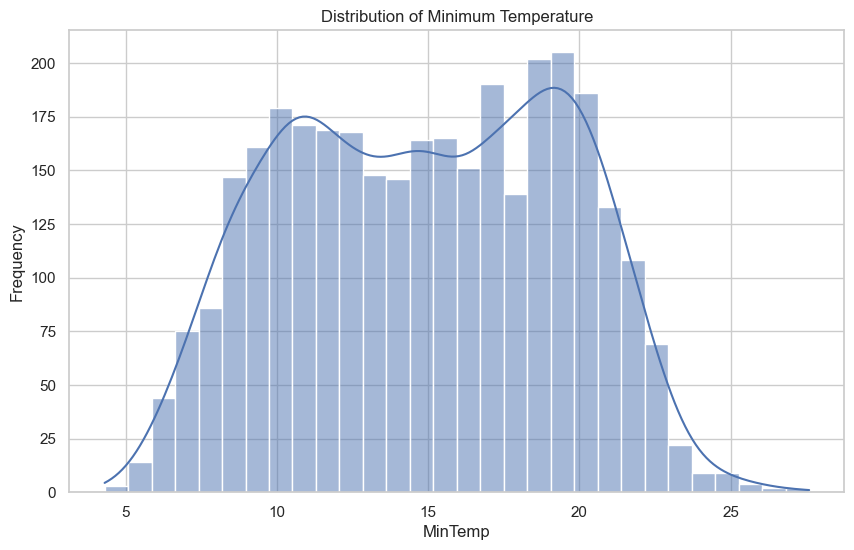

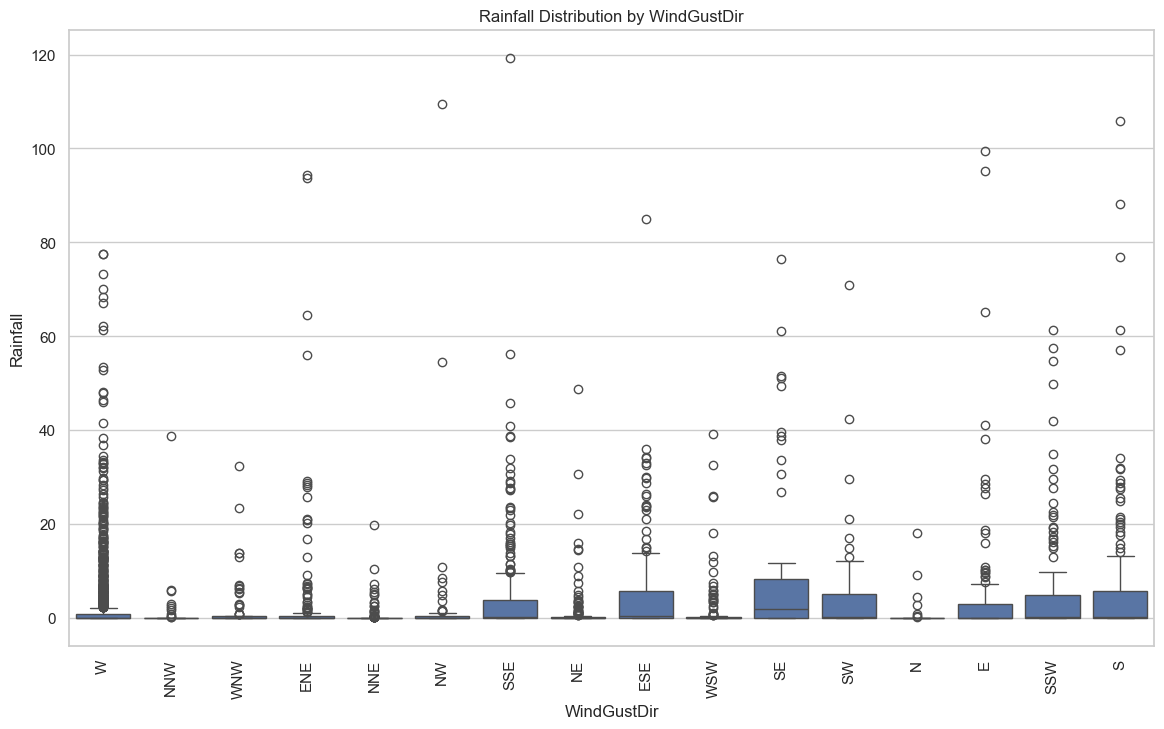

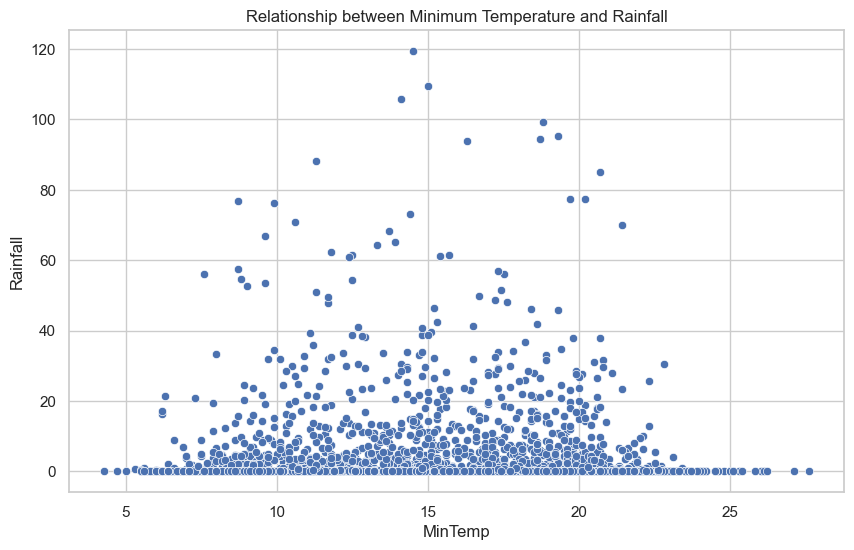

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Histogram - View the distribution of a variable, e.g., Minimum Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['MinTemp'].dropna(), bins=30, kde=True)
plt.title('Distribution of Minimum Temperature')
plt.xlabel('MinTemp')
plt.ylabel('Frequency')
plt.show()

# Boxplot - View the distribution of Rainfall by WindGustDir
plt.figure(figsize=(14, 8))
sns.boxplot(x='WindGustDir', y='Rainfall', data=df)
plt.title('Rainfall Distribution by WindGustDir')
plt.xlabel('WindGustDir')
plt.ylabel('Rainfall')
plt.xticks(rotation=90)
plt.show()

# Scatterplot - Explore the relationship between Temperature and Rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MinTemp', y='Rainfall', data=df)
plt.title('Relationship between Minimum Temperature and Rainfall')
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')
plt.show()


### Seasonal Rainfall Analysis


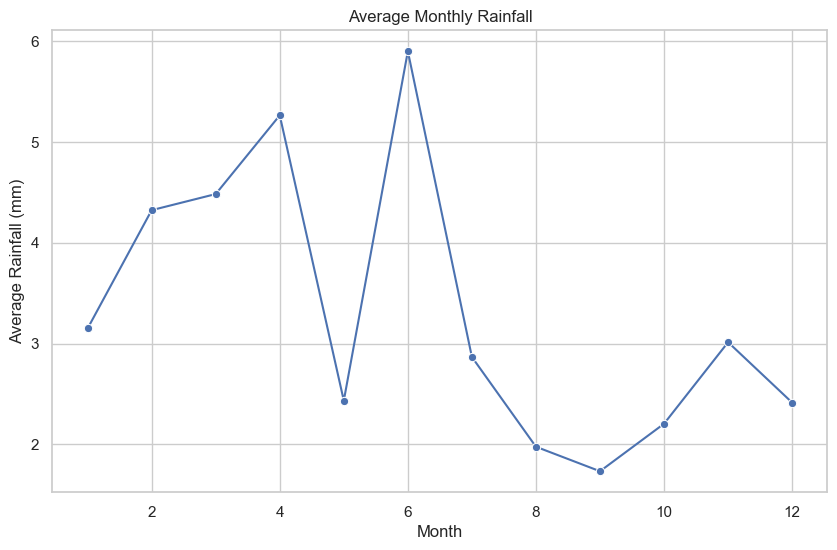

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from the date
df['Month'] = df['Date'].dt.month

# Group by month and calculate average rainfall
monthly_rainfall = df.groupby('Month')['Rainfall'].mean()

# Plot the average monthly rainfall
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_rainfall, marker='o')
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.show()


### Rainfall vs. Temperature

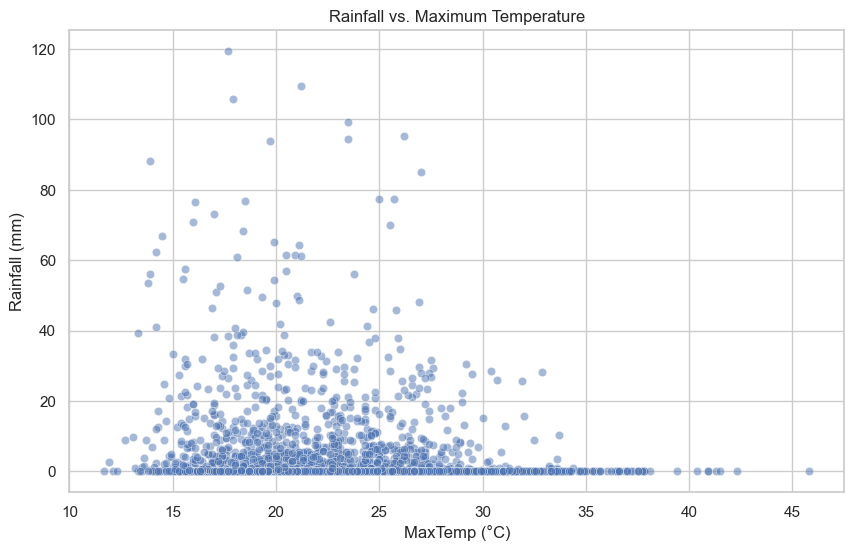

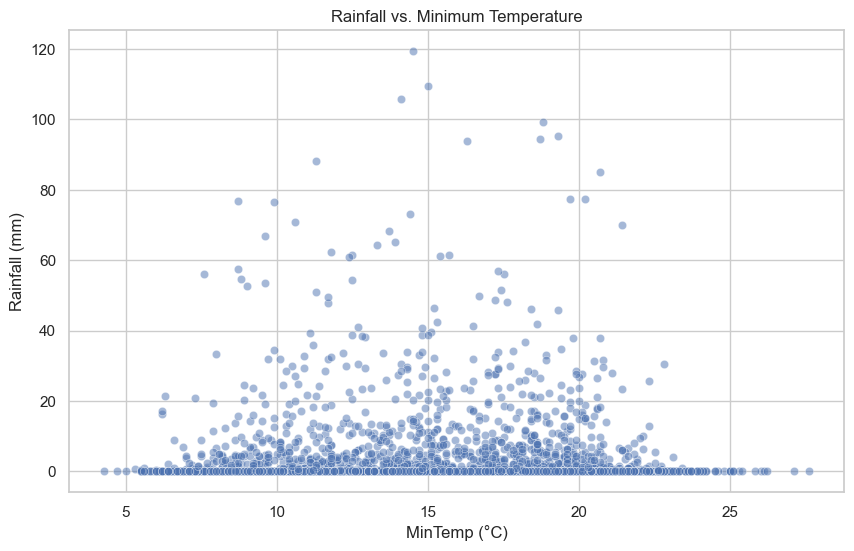

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Rainfall vs MaxTemp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df, alpha=0.5)
plt.title('Rainfall vs. Maximum Temperature')
plt.xlabel('MaxTemp (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()

# Scatter plot of Rainfall vs MinTemp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MinTemp', y='Rainfall', data=df, alpha=0.5)
plt.title('Rainfall vs. Minimum Temperature')
plt.xlabel('MinTemp (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()


### Rainfall Distribution by Wind Speed


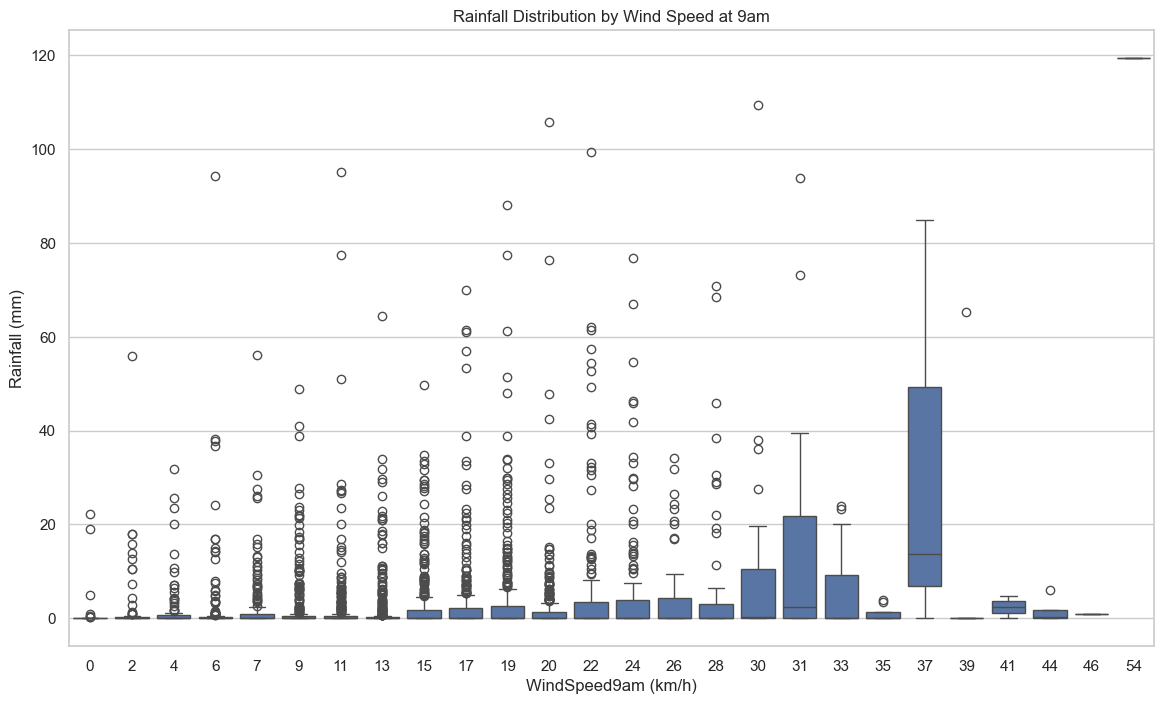

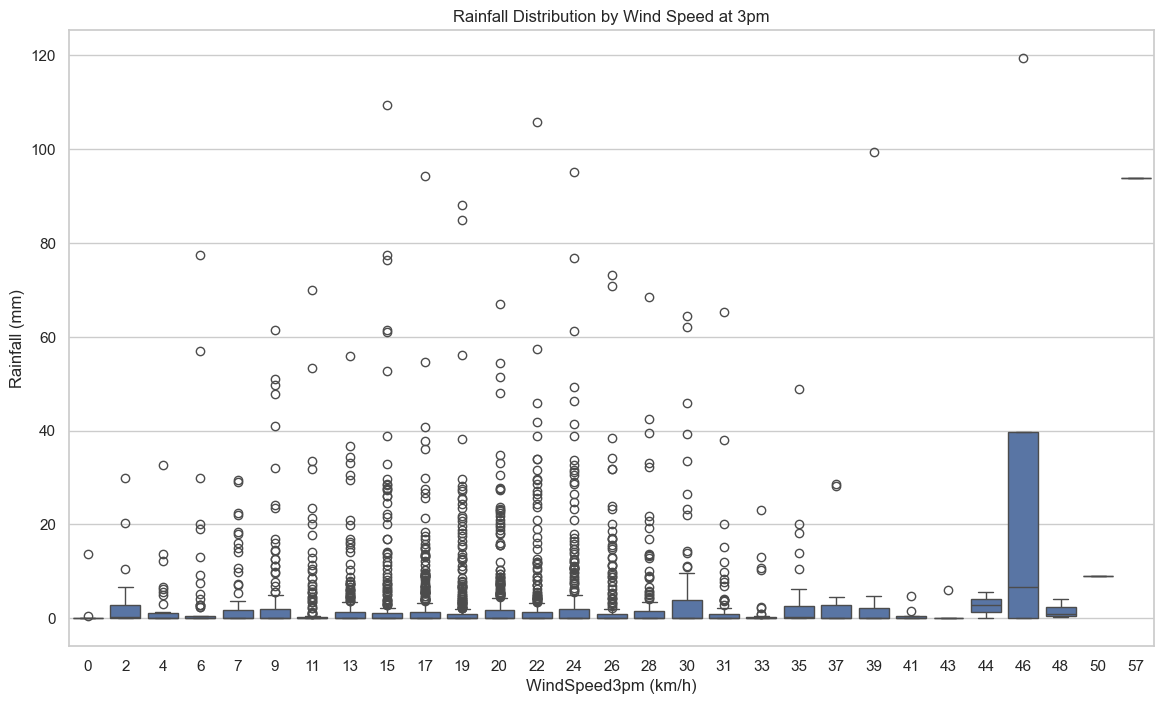

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of Rainfall by WindSpeed9am
plt.figure(figsize=(14, 8))
sns.boxplot(x='WindSpeed9am', y='Rainfall', data=df)
plt.title('Rainfall Distribution by Wind Speed at 9am')
plt.xlabel('WindSpeed9am (km/h)')
plt.ylabel('Rainfall (mm)')
plt.show()

# Boxplot of Rainfall by WindSpeed3pm
plt.figure(figsize=(14, 8))
sns.boxplot(x='WindSpeed3pm', y='Rainfall', data=df)
plt.title('Rainfall Distribution by Wind Speed at 3pm')
plt.xlabel('WindSpeed3pm (km/h)')
plt.ylabel('Rainfall (mm)')
plt.show()


## EDA with SQL


In [9]:
import pandas as pd
import sqlite3

# Create a SQLite in-memory database and establish a connection
conn = sqlite3.connect(':memory:')

# Write the DataFrame to the SQLite table
df.to_sql('weather_data', conn, index=False, if_exists='replace')

# Create a cursor object
cur = conn.cursor()

# SQL query example: Calculate the average rainfall by WindGustDir
query_avg_rainfall = """
SELECT WindGustDir, AVG(Rainfall) as avg_rainfall
FROM weather_data
GROUP BY WindGustDir
"""
avg_rainfall_df = pd.read_sql_query(query_avg_rainfall, conn)
print("Average Rainfall by WindGustDir")
print(avg_rainfall_df)


Average Rainfall by WindGustDir
   WindGustDir  avg_rainfall
0            E      5.288525
1          ENE      3.038318
2          ESE      5.814286
3            N      1.180000
4           NE      1.377515
5          NNE      0.539597
6          NNW      1.165385
7           NW      3.176471
8            S      6.381065
9           SE      9.464706
10         SSE      4.933891
11         SSW      5.117791
12          SW      5.740000
13           W      2.651368
14         WNW      1.865823
15         WSW      1.862687


## Build a Dashboard with Plotly Dash


In [10]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Weather Data Dashboard"),
    
    html.Div([
        html.Label("Select a feature for Histogram:"),
        dcc.Dropdown(
            id='histogram-feature',
            options=[{'label': col, 'value': col} for col in df.columns],
            value='MinTemp'
        ),
    ]),
    
    dcc.Graph(id='histogram-graph'),

    html.Div([
        html.Label("Select a feature for Boxplot:"),
        dcc.Dropdown(
            id='boxplot-feature',
            options=[{'label': col, 'value': col} for col in df.columns],
            value='Rainfall'
        ),
    ]),
    
    dcc.Graph(id='boxplot-graph'),

    html.Div([
        html.Label("Select features for Scatter Plot:"),
        dcc.Dropdown(
            id='scatter-x-feature',
            options=[{'label': col, 'value': col} for col in df.columns],
            value='MinTemp',
            clearable=False
        ),
        dcc.Dropdown(
            id='scatter-y-feature',
            options=[{'label': col, 'value': col} for col in df.columns],
            value='Rainfall',
            clearable=False
        ),
    ], style={'display': 'flex', 'gap': '10px'}),
    
    dcc.Graph(id='scatter-graph'),
])

@app.callback(
    Output('histogram-graph', 'figure'),
    Input('histogram-feature', 'value')
)
def update_histogram(selected_feature):
    fig = px.histogram(df, x=selected_feature, nbins=30, title=f'Histogram of {selected_feature}')
    return fig

@app.callback(
    Output('boxplot-graph', 'figure'),
    Input('boxplot-feature', 'value')
)
def update_boxplot(selected_feature):
    fig = px.box(df, y=selected_feature, title=f'Boxplot of {selected_feature}')
    return fig

@app.callback(
    Output('scatter-graph', 'figure'),
    [Input('scatter-x-feature', 'value'),
     Input('scatter-y-feature', 'value')]
)
def update_scatter(x_feature, y_feature):
    fig = px.scatter(df, x=x_feature, y=y_feature, title=f'Scatter Plot of {x_feature} vs {y_feature}')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


## Predictive Analysis (Classification)


Accuracy: 0.83
Precision: 0.74
Recall: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       721
           1       0.74      0.56      0.64       261

    accuracy                           0.83       982
   macro avg       0.80      0.74      0.76       982
weighted avg       0.82      0.83      0.82       982



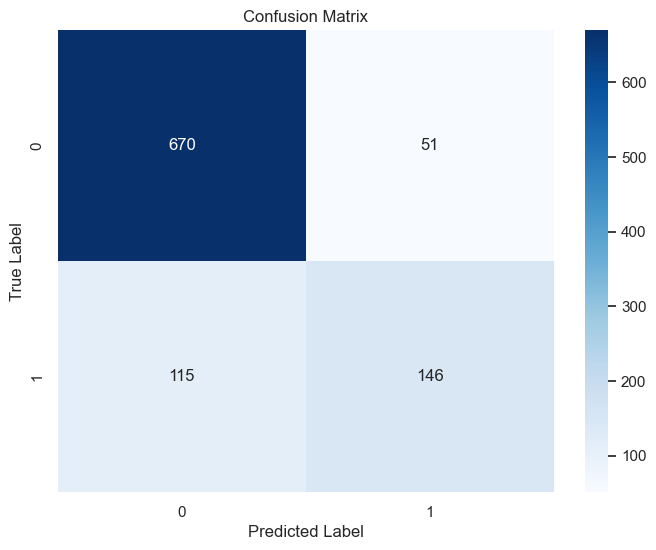

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Handle missing values (simple example, more preprocessing might be needed in practice)
df.dropna(inplace=True)

# Features and target variable
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
        'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
        'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
